# Import data, fist exploration 

In [2]:
import os
path = os.path.join('data','raw') # A default location to save raw data

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

In [3]:
fn='coursework_1_data_2019.csv'

#read in the csv

import pandas as pd
#df = pd.read_csv(os.path.join(path,fn), low_memory=False, usecols=cols)
df = pd.read_csv(os.path.join(path,fn), low_memory=False)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")
df
df.head()

df.info()


Data frame is 152 x 28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female

In [4]:
df.describe() # Information about each Series

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,...,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02,1.520000e+02,152.000000,152.000000,152.000000,152.00000,...,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1075.296053,1159.513158,1278.605263,3.409223e+05,3.542821e+05,3.682895e+05,375.796053,401.526316,438.276316,166914.75000,...,174007.565789,182291.480263,191112.500000,2.703092e+05,59368.421053,68427.631579,25111.842105,62631.578947,32967.105263,21802.631579
std,922.378705,997.231047,1069.691997,2.621354e+05,2.788745e+05,2.945969e+05,323.560804,353.756510,376.478018,128635.27204,...,133527.499451,142585.690264,149675.481541,2.104618e+05,53980.948836,62114.997173,22815.281663,55056.104342,29930.253972,19832.423607
min,5.000000,1.000000,4.000000,2.200000e+03,2.385000e+03,2.440000e+03,2.000000,0.000000,1.000000,1085.00000,...,1115.000000,1080.000000,1014.000000,2.000000e+03,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000
25%,493.500000,531.750000,592.500000,1.894748e+05,1.880672e+05,1.934285e+05,175.750000,183.250000,198.250000,93000.25000,...,95983.750000,99307.250000,101902.750000,1.400000e+05,26000.000000,32000.000000,11750.000000,31750.000000,14000.000000,9000.000000
50%,729.000000,794.500000,873.500000,2.540925e+05,2.577715e+05,2.642035e+05,266.000000,271.000000,293.500000,122694.00000,...,128675.500000,135104.000000,140668.500000,2.000000e+05,41500.000000,48000.000000,18000.000000,45000.000000,25000.000000,16000.000000
75%,1386.000000,1470.250000,1641.500000,3.751225e+05,4.024990e+05,4.094285e+05,473.750000,519.250000,554.750000,183610.00000,...,191395.500000,197497.750000,213147.750000,3.017500e+05,70000.000000,79000.000000,26500.000000,69750.000000,39750.000000,27250.000000
max,5065.000000,5582.000000,5745.000000,1.411380e+06,1.528154e+06,1.623387e+06,1762.000000,2065.000000,2000.000000,694681.00000,...,716699.000000,773508.000000,832527.000000,1.170000e+06,297000.000000,333000.000000,130000.000000,340000.000000,203000.000000,99000.000000


In [6]:
cols=list(df.columns.values)
print(cols)

['local_authority_area', '2008_cases_total', '2013_cases_total', '2018_cases_total', '2008_pop_total', '2013_pop_total', '2018_pop_total', '2008_cases_male', '2013_cases_male', '2018_cases_male', '2008_pop_male', '2013_pop_male', '2018_pop_male', '2008_cases_female', '2013_cases_female', '2018_cases_female', '2008_pop_female', '2013_pop_female', '2018_pop_female', 'total_budget', 'clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'sub_counselling', 'region', 'local_authority_type']


In [7]:
df.isnull().sum(axis=0).sort_values(ascending=False)

local_authority_area    0
2008_cases_total        0
region                  0
sub_counselling         0
media_awareness         0
school_awareness        0
health_training         0
clean_environ           0
clean_air               0
total_budget            0
2018_pop_female         0
2013_pop_female         0
2008_pop_female         0
2018_cases_female       0
2013_cases_female       0
2008_cases_female       0
2018_pop_male           0
2013_pop_male           0
2008_pop_male           0
2018_cases_male         0
2013_cases_male         0
2008_cases_male         0
2018_pop_total          0
2013_pop_total          0
2008_pop_total          0
2018_cases_total        0
2013_cases_total        0
local_authority_type    0
dtype: int64

# How the Datat is distributed
Plotting histograms for the total number of cases in each year, 2008,2013 and 2018 we see that the distribution is similarly right skewed


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#df.boxplot(by ='size', column =['tip'], grid = False)

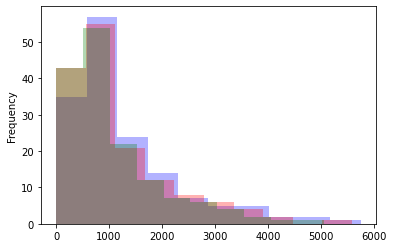

In [19]:
hist2018= df['2018_cases_total'].plot.hist(alpha=0.3, color='blue') # histogram
hist2013=df['2013_cases_total'].plot.hist(alpha=0.3, color='red') # histogram
hist2008=df['2008_cases_total'].plot.hist(alpha=0.3,color='green')  # histogram


<AxesSubplot:ylabel='Frequency'>

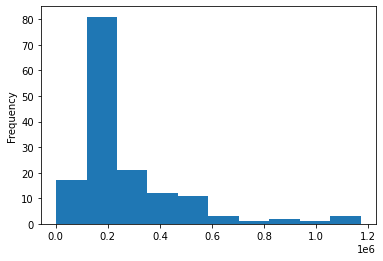

In [33]:
df['total_budget'].plot.hist() # histogram

In [5]:
# df.plot.scatter(x='2008_cases_total', y='2008_pop_total', s=3
#                , cmap='viridis', figsize=(15,10))

In [6]:
df['diff_cases'] = df['2018_cases_total'] - df['2008_cases_total']
df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,diff_cases
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,139000,21000,22000,18000,41000,18000,19000,London,london_borough,170
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,220000,50000,17000,23000,74000,30000,26000,London,london_borough,234
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,167
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority,38
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority,56


<AxesSubplot:ylabel='Frequency'>

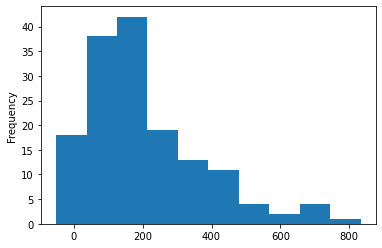

In [11]:
df['diff_cases'].plot.hist() # histogram

In [12]:
df.insert(2,'2008_cases_perc', df['2008_cases_total']*100/df['2008_pop_total'])
df.insert(4,'2013_cases_perc', df['2013_cases_total']*100/df['2013_pop_total'])
df.insert(6,'2018_cases_perc', df['2018_cases_total']*100/df['2018_pop_total'])
df

,local_authority_area,2008_cases_total,2008_cases_perc,2013_cases_total,2013_cases_perc,2018_cases_total,2018_cases_perc,2008_pop_total,2013_pop_total,2018_pop_total,...,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,diff_cases
0,Barking and Dagenham,593,0.343402,619,0.345752,763,0.419740,172684,179030,181779,...,139000,21000,22000,18000,41000,18000,19000,London,london_borough,170
1,Barnet,539,0.158327,594,0.172643,773,0.217162,340435,344062,355955,...,220000,50000,17000,23000,74000,30000,26000,London,london_borough,234
2,Barnsley,360,0.158762,451,0.184828,527,0.204356,226755,244010,257883,...,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,167
3,Bath and North East Somerset,456,0.255283,421,0.243388,494,0.260915,178625,172975,189334,...,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority,38
4,Bedford,311,0.196605,327,0.198414,367,0.215296,158185,164807,170463,...,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Wirral,2560,0.824132,2652,0.849613,2987,0.872881,310630,312142,342200,...,209000,69000,47000,30000,41000,14000,8000,North West,metropolitan_borough,427
148,Wokingham,119,0.074004,146,0.088066,169,0.101388,160803,165785,166687,...,109000,20000,41000,13000,19000,10000,6000,South East,unitary_authority,50
149,Wolverhampton,1442,0.601475,1571,0.623123,1728,0.654454,239744,252117,264037,...,201000,18000,27000,23000,55000,50000,28000,West Midlands,metropolitan_borough,286
150,Worcestershire,2718,0.486108,3061,0.505137,3237,0.508297,559135,605974,636832,...,470000,128000,112000,57000,76000,67000,30000,West Midlands,non_metropolitan_county,519


In [18]:
col_num= df.columns.get_loc("total_budget")
df.insert((col_num+1),'2008_totbudg_pers', df['total_budget']/df['2008_pop_total'])
df.insert((col_num+2),'2013_totbudg_pers', df['total_budget']/df['2013_pop_total'])
df.insert((col_num+3),'2018_totbudg_pers', df['total_budget']/df['2018_pop_total'])

df


In [13]:

#df.sample(5,random_state=42)

#df.sample(5, random_state=42)[money]

#df.insert(len(df.columns)-1, 'b', df.pop('b'))
#df.insert(len(df.columns)-1, 'x', df.pop('x'))

#column_to_move = df.pop("name")

# insert column with insert(location, column_name, column_value)

#df.insert(0, "name", column_to_move)

In [20]:
df.describe()

,2008_cases_total,2008_cases_perc,2013_cases_total,2013_cases_perc,2018_cases_total,2018_cases_perc,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,...,2008_totbudg_pers,2013_totbudg_pers,2018_totbudg_pers,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,diff_cases
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02,1.520000e+02,152.000000,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1075.296053,0.309725,1159.513158,0.320978,1278.605263,0.344673,3.409223e+05,3.542821e+05,3.682895e+05,375.796053,...,0.818886,0.801851,0.785079,59368.421053,68427.631579,25111.842105,62631.578947,32967.105263,21802.631579,203.309211
std,922.378705,0.137058,997.231047,0.139096,1069.691997,0.138712,2.621354e+05,2.788745e+05,2.945969e+05,323.560804,...,0.303877,0.361622,0.449662,53980.948836,62114.997173,22815.281663,55056.104342,29930.253972,19832.423607,169.732288
min,5.000000,0.074004,1.000000,0.041929,4.000000,0.101388,2.200000e+03,2.385000e+03,2.440000e+03,2.000000,...,0.646232,0.613481,0.584027,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,-52.000000
25%,493.500000,0.214841,531.750000,0.226886,592.500000,0.253539,1.894748e+05,1.880672e+05,1.934285e+05,175.750000,...,0.739239,0.713571,0.682885,26000.000000,32000.000000,11750.000000,31750.000000,14000.000000,9000.000000,84.000000
50%,729.000000,0.291452,794.500000,0.298483,873.500000,0.318207,2.540925e+05,2.577715e+05,2.642035e+05,266.000000,...,0.791615,0.766404,0.742735,41500.000000,48000.000000,18000.000000,45000.000000,25000.000000,16000.000000,158.500000
75%,1386.000000,0.365028,1470.250000,0.381066,1641.500000,0.406704,3.751225e+05,4.024990e+05,4.094285e+05,473.750000,...,0.841607,0.825567,0.809500,70000.000000,79000.000000,26500.000000,69750.000000,39750.000000,27250.000000,283.750000
max,5065.000000,0.824132,5582.000000,0.849613,5745.000000,0.872881,1.411380e+06,1.528154e+06,1.623387e+06,1762.000000,...,4.394445,5.082334,6.167510,297000.000000,333000.000000,130000.000000,340000.000000,203000.000000,99000.000000,833.000000


In [21]:
#df.sort_values(['Year','ID'], ascending=False).head(20).median()

df.sort_values(['diff_cases'],ascending=False)

,local_authority_area,2008_cases_total,2008_cases_perc,2013_cases_total,2013_cases_perc,2018_cases_total,2018_cases_perc,2008_pop_total,2013_pop_total,2018_pop_total,...,2018_totbudg_pers,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,diff_cases
68,Lancashire,4199,0.357926,4419,0.365566,5032,0.397100,1173146,1208809,1267187,...,0.631320,180000,292000,41000,163000,33000,91000,North West,non_metropolitan_county,833
6,Birmingham,3207,0.312501,3621,0.334291,3927,0.361448,1026238,1083189,1086463,...,0.764867,64000,272000,130000,126000,140000,99000,West Midlands,metropolitan_borough,720
120,Staffordshire,4044,0.485643,4357,0.489058,4762,0.507407,832711,890897,938497,...,0.597764,158000,173000,35000,99000,60000,36000,West Midlands,non_metropolitan_county,718
62,Kent,3356,0.237781,3703,0.242319,4063,0.250279,1411380,1528154,1623387,...,0.720715,278000,333000,84000,291000,121000,63000,South East,non_metropolitan_county,707
92,Nottinghamshire,5065,0.650493,5582,0.647345,5745,0.660207,778640,862292,870182,...,0.607919,134000,126000,70000,166000,13000,20000,East Midlands,non_metropolitan_county,680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Rutland,88,0.229388,102,0.255819,86,0.200224,38363,39872,42952,...,1.187372,17000,5000,8000,14000,5000,2000,East Midlands,unitary_authority,-2
25,City of London,16,0.140622,14,0.142305,12,0.148020,11378,9838,8107,...,6.167510,12000,9000,6000,20000,2000,1000,London,other_london,-4
91,Nottingham,2098,0.702499,2226,0.718039,2080,0.711386,298648,310011,292387,...,0.755848,45000,42000,23000,82000,22000,7000,East Midlands,unitary_authority,-18
48,Hammersmith and Fulham,518,0.305129,532,0.314942,493,0.336133,169764,168920,146668,...,0.824993,28000,26000,13000,36000,14000,4000,London,london_borough,-25


In [22]:
df['diff_perc']=df['2018_cases_perc']-df['2008_cases_perc']
df.describe()

,2008_cases_total,2008_cases_perc,2013_cases_total,2013_cases_perc,2018_cases_total,2018_cases_perc,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,...,2013_totbudg_pers,2018_totbudg_pers,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,diff_cases,diff_perc
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02,1.520000e+02,152.000000,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1075.296053,0.309725,1159.513158,0.320978,1278.605263,0.344673,3.409223e+05,3.542821e+05,3.682895e+05,375.796053,...,0.801851,0.785079,59368.421053,68427.631579,25111.842105,62631.578947,32967.105263,21802.631579,203.309211,0.034948
std,922.378705,0.137058,997.231047,0.139096,1069.691997,0.138712,2.621354e+05,2.788745e+05,2.945969e+05,323.560804,...,0.361622,0.449662,53980.948836,62114.997173,22815.281663,55056.104342,29930.253972,19832.423607,169.732288,0.025197
min,5.000000,0.074004,1.000000,0.041929,4.000000,0.101388,2.200000e+03,2.385000e+03,2.440000e+03,2.000000,...,0.613481,0.584027,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,-52.000000,-0.063338
25%,493.500000,0.214841,531.750000,0.226886,592.500000,0.253539,1.894748e+05,1.880672e+05,1.934285e+05,175.750000,...,0.713571,0.682885,26000.000000,32000.000000,11750.000000,31750.000000,14000.000000,9000.000000,84.000000,0.017688
50%,729.000000,0.291452,794.500000,0.298483,873.500000,0.318207,2.540925e+05,2.577715e+05,2.642035e+05,266.000000,...,0.766404,0.742735,41500.000000,48000.000000,18000.000000,45000.000000,25000.000000,16000.000000,158.500000,0.031374
75%,1386.000000,0.365028,1470.250000,0.381066,1641.500000,0.406704,3.751225e+05,4.024990e+05,4.094285e+05,473.750000,...,0.825567,0.809500,70000.000000,79000.000000,26500.000000,69750.000000,39750.000000,27250.000000,283.750000,0.050573
max,5065.000000,0.824132,5582.000000,0.849613,5745.000000,0.872881,1.411380e+06,1.528154e+06,1.623387e+06,1762.000000,...,5.082334,6.167510,297000.000000,333000.000000,130000.000000,340000.000000,203000.000000,99000.000000,833.000000,0.101448


In [27]:
# Average annual budget per person = total annual budget / average population

#df["avrg_pop"] = (df["2008_pop_total"] + df["2013_pop_total"]+ df["2018_pop_total"])/3
df["avrg_an_budg_per_pers"] = df["total_budget"]/ df["avrg_pop"]
df

,local_authority_area,2008_cases_total,2008_cases_perc,2013_cases_total,2013_cases_perc,2018_cases_total,2018_cases_perc,2008_pop_total,2013_pop_total,2018_pop_total,...,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,diff_cases,diff_perc,avrg_pop,avrg_an_budg_per_pers
0,Barking and Dagenham,593,0.343402,619,0.345752,763,0.419740,172684,179030,181779,...,18000,41000,18000,19000,London,london_borough,170,0.076339,177831.000000,0.781641
1,Barnet,539,0.158327,594,0.172643,773,0.217162,340435,344062,355955,...,23000,74000,30000,26000,London,london_borough,234,0.058835,346817.333333,0.634340
2,Barnsley,360,0.158762,451,0.184828,527,0.204356,226755,244010,257883,...,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,167,0.045595,242882.666667,0.658754
3,Bath and North East Somerset,456,0.255283,421,0.243388,494,0.260915,178625,172975,189334,...,19000,50000,10000,7000,South West,unitary_authority,38,0.005631,180311.333333,0.892900
4,Bedford,311,0.196605,327,0.198414,367,0.215296,158185,164807,170463,...,17000,8000,3000,13000,East of England,unitary_authority,56,0.018691,164485.000000,0.790346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Wirral,2560,0.824132,2652,0.849613,2987,0.872881,310630,312142,342200,...,30000,41000,14000,8000,North West,metropolitan_borough,427,0.048750,321657.333333,0.649760
148,Wokingham,119,0.074004,146,0.088066,169,0.101388,160803,165785,166687,...,13000,19000,10000,6000,South East,unitary_authority,50,0.027384,164425.000000,0.662916
149,Wolverhampton,1442,0.601475,1571,0.623123,1728,0.654454,239744,252117,264037,...,23000,55000,50000,28000,West Midlands,metropolitan_borough,286,0.052979,251966.000000,0.797727
150,Worcestershire,2718,0.486108,3061,0.505137,3237,0.508297,559135,605974,636832,...,57000,76000,67000,30000,West Midlands,non_metropolitan_county,519,0.022189,600647.000000,0.782490


In [28]:
cols=list(df.columns.values)
print(cols)

#subdf1=df.loc[0:,'region':'2018_perc',]

['local_authority_area', '2008_cases_total', '2008_cases_perc', '2013_cases_total', '2013_cases_perc', '2018_cases_total', '2018_cases_perc', '2008_pop_total', '2013_pop_total', '2018_pop_total', '2008_cases_male', '2013_cases_male', '2018_cases_male', '2008_pop_male', '2013_pop_male', '2018_pop_male', '2008_cases_female', '2013_cases_female', '2018_cases_female', '2008_pop_female', '2013_pop_female', '2018_pop_female', 'total_budget', '2008_totbudg_pers', '2013_totbudg_pers', '2018_totbudg_pers', 'clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'sub_counselling', 'region', 'local_authority_type', 'diff_cases', 'diff_perc', 'avrg_pop', 'avrg_an_budg_per_pers']


In [33]:
#df1=df.loc[0:,('local_authority_area','diff_perc','avrg_an_budg_per_pers')]
df1.set_index('local_authority_area',inplace=True)
df1


,diff_perc,avrg_an_budg_per_pers
local_authority_area,,
Barking and Dagenham,0.076339,0.781641
Barnet,0.058835,0.634340
Barnsley,0.045595,0.658754
Bath and North East Somerset,0.005631,0.892900
Bedford,0.018691,0.790346
...,...,...
Wirral,0.048750,0.649760
Wokingham,0.027384,0.662916
Wolverhampton,0.052979,0.797727


In [34]:
path = os.path.join('data','editted')
fn_new   = 'coursework_1_data_2019_edit.csv'
print(os.getcwd())
print(f"Working directory is: {os.getcwd().replace('/home/jovyan/work/','')}")

if not os.path.exists(path):
    print(f"Creating '{path}' directory...")
    os.makedirs(path)

df.to_csv(os.path.join(path,fn_new),index=False)
print("Done.")

/home/jovyan/work/Documents/CASA/modules/CASA0007_QM/assessment 1
Working directory is: Documents/CASA/modules/CASA0007_QM/assessment 1
Creating 'data/editted' directory...
Done.


In [36]:
fn1= "simple_lr_cases_budget.csv"
df1.to_csv(os.path.join(path,fn1),index=False)
print("Done.")

Done.


## SIMPLE LINEAR REGRESSION
# first summary statistics, histograms and boxplot
check if there are outliers in the data


<AxesSubplot:ylabel='Frequency'>

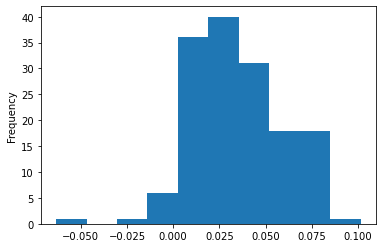

In [37]:
df1['diff_perc'].plot.hist() # histogram

<AxesSubplot:ylabel='Frequency'>

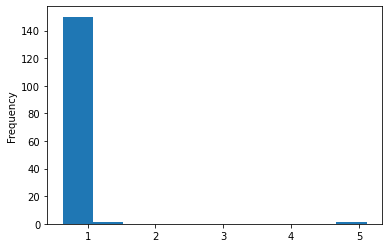

In [38]:
df1["avrg_an_budg_per_pers"].plot.hist() # histogram

In [ ]:
df1.plot.scatter("avrg_an_budg_per_pers", "diff_perc")

# BOX PLOTS

<AxesSubplot:>

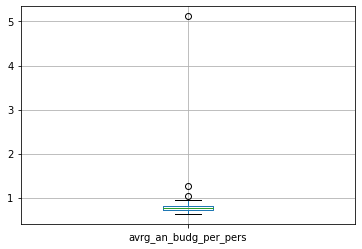

In [47]:
#DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)
#b_list=("avrg_an_budg_per_pers", "diff_perc")

df1.boxplot(column="avrg_an_budg_per_pers", by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None)


<AxesSubplot:>

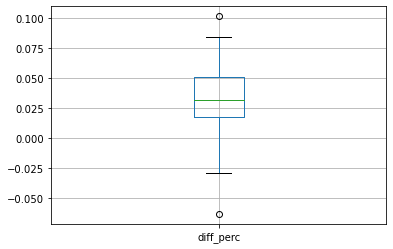

In [48]:
df1.boxplot(column="diff_perc", by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None)

In [64]:
Q1=(df1_out.iat[4,0])
print(Q1)
Q3=(df1_out.iat[6,0])
print(Q3)

IQR = Q3 - Q1

0.017688315118742054
0.050572877687917205


In [159]:
# function in progress for finding the outliers

"""
def Remove_Outliers(df):
    cols=list(df.columns.values)
    for column in cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        trueList = ~((df[cols.index(column)] < (Q1 - 1.5 * IQR)) | (df[cols.index(column)] > (Q3 + 1.5 * IQR)))
    return trueList

Remove_Outliers(df1)
"""


KeyError: 0

In [116]:
#df1['diff_perc'].quantile(0.25)
test_cols= df1.columns.values
print(test_cols)

for column in test_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df[test_cols[int(column)]] < (Q1 - 1.5 * IQR)) |(df[test_cols[int(column)]] > (Q3 + 1.5 * IQR)))
#return trueList

['diff_perc' 'avrg_an_budg_per_pers']


ValueError: invalid literal for int() with base 10: 'diff_perc'

In [149]:
df1[test_cols[0]]
trueList = ~ ((df1[test_cols[0]] < (Q1 - 1.5 * IQR)) | (df1[test_cols[0]] > (Q3 + 1.5 * IQR)))
print(trueList)

print(trueList.sort_values(ascending=False))

df1.insert(1,"outlier", trueList)

df1

local_authority_area
Barking and Dagenham            True
Barnet                          True
Barnsley                        True
Bath and North East Somerset    True
Bedford                         True
                                ... 
Wirral                          True
Wokingham                       True
Wolverhampton                   True
Worcestershire                  True
York                            True
Name: diff_perc, Length: 152, dtype: bool
local_authority_area
Barking and Dagenham     True
Rotherham                True
Poole                    True
Portsmouth               True
Reading                  True
                        ...  
Hartlepool               True
Havering                 True
York                     True
Hackney                 False
Isles of Scilly         False
Name: diff_perc, Length: 152, dtype: bool


,diff_perc,outlier,avrg_an_budg_per_pers
local_authority_area,,,
Barking and Dagenham,0.076339,True,0.781641
Barnet,0.058835,True,0.634340
Barnsley,0.045595,True,0.658754
Bath and North East Somerset,0.005631,True,0.892900
Bedford,0.018691,True,0.790346
...,...,...,...
Wirral,0.048750,True,0.649760
Wokingham,0.027384,True,0.662916
Wolverhampton,0.052979,True,0.797727


In [156]:
df1.groupby("outlier")["diff_perc"].value_counts()


outlier  diff_perc
False    -0.063338    1
          0.101448    1
True     -0.029164    1
         -0.013745    1
         -0.009819    1
                     ..
          0.077031    1
          0.080577    1
          0.081390    1
          0.081654    1
          0.084385    1
Name: diff_perc, Length: 152, dtype: int64

In [139]:
#df1.sort_values("diff_perc", ascending=True)

df1[(df1.diff_perc < (Q1 - 1.5 * IQR)) | (df1.diff_perc > (Q3 + 1.5 * IQR))]["diff_perc"]


local_authority_area
Hackney            0.101448
Isles of Scilly   -0.063338
Name: diff_perc, dtype: float64

In [111]:

print(type(trueList))
#print(trueList.options.display.max_colwidth)
#trueList.groupby("diff_perc").sum()

#df.groupby('room_type')['property_type'].value_counts()
#subdf1[subdf1["diff_perc"]>0].groupby('region').sum()

print(list(trueList.values))

<class 'pandas.core.series.Series'>
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [ ]:


def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList


In [ ]:
# This program performs a linear regression from data stored in a csv file,
# plots a scatter plot with line of best fit and saves it as a png image.

# The data file must be two columns of numbers, the x values and y values - no column labels, etc.
# It must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file population_regression_data.csv for reference.

# In the next line, replace sample_boxplot_data.csv with the filename of your data:
data_filename = 'population_regression_data.csv'

# In the next line, replace boxplot with the filename you wish to save as:
output_filename = 'regression_figure.png'

# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 10,10

# You can ignore these two lines:
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np

data = np.genfromtxt(data_filename,delimiter = ',')

# If there are errors importing the data, you can also copy the data in as a list.
# e.g. data = [1.95878982, 2.59203983, 1.22704688, ...]


In [ ]:
# This program performs a multiple linear regression from data stored in a csv file.

# The data file must be in columns of numbers - no column labels, etc.
# The first column is the y values, the following columns are the predictors x1, x2, x3, etc.

# This data must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file demo_multreg_data_example.csv for reference.

# In the next line, replace demo_multreg_data_example.csv with the filename of your data:
data_filename = 'demo_multreg_data_example.csv'

# The next lines import the necessary packages to perform the regression:
import statsmodels.api as sms
import numpy as np

data = np.genfromtxt(data_filename,delimiter = ',')

# If there are errors importing the data, you can also copy it in as follows:
# e.g. data = [[737.4776314, 34, 65],
#              [869.2063792, 57, 73],
#              [1033.705248, 59, 100],
#              ...
#              [737.5129466, 66, 49]]
# (Compare this example with the file demo_multreg_data_example.csv)

# These lines extract the y-values and the x-values from the data:
y_values = data[:,0]
x_values = data[:,1:]

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
predictor_coeffs  = regression_model_b.params[1:]
constant          = regression_model_b.params[0] # called the 'intercept' in simple regression
Rsquared          = regression_model_b.rsquared
MSE               = regression_model_b.mse_resid
pvalues_T         = regression_model_b.pvalues[1:]
pvalue_F          = regression_model_b.f_pvalue

# Note that predictor_coeffs is a list of the best-fit coefficients for x1, x2, x3, ...
# Similarly, pvalues_T is a list of the p-values associated with each of these variables in turn.

# Print these summary stats:
print("predictor coefficients =", predictor_coeffs)
print("constant               =", constant)
print("Rsquared               =", Rsquared)
print("MSE                    =", MSE)
print("T-test pvalues         =", pvalues_T)
print("F-test pvalue          =", pvalue_F)


In [21]:
import seaborn as sns

In [23]:
# g= sns.pairplot(df)